In [12]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [13]:
(x_train, _),(x_test, _) = mnist.load_data()

In [21]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [22]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [23]:
encoder = keras.Model(input_img, encoded)

In [24]:
#This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
#Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
#Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 0.1920 - val_loss: 0.1339
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1188 - val_loss: 0.1065
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1027 - val_loss: 0.0978
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0969 - val_loss: 0.0945
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0951 - val_loss: 0.0935
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0944 - val_loss: 0.0928
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0941 - val_loss: 0.0928
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0938 - val_loss: 0.0924
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0935 - val_loss: 0.0922

In [27]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 839us/step


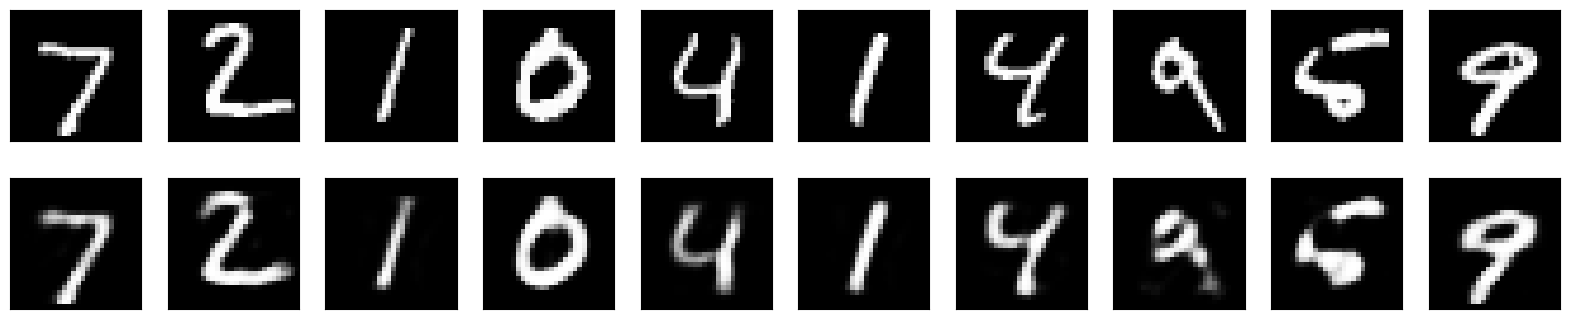

In [30]:
import matplotlib.pyplot as plt

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()